# $\renewcommand{\rmdefault}{ftm} Лабораторная\ работа\ №5.\ Гавриков\ А.\ С.$

## $\renewcommand{\rmdefault}{ftm} Электрон\ ускорен\ в\ режиме\ ГА\ до\ энергии\ =\ 5\ МэВ.\ Напряженность\ электрического\ СВЧ\ поля\  =\ 0,5\ кВ/см. Как\ затормозить\ электрон\ до\ энергии\ 20\ кэВ\ за\ кратчайшее\ время?\ Как\ изменятся\ параметры,\ необходимые\ для\ торможения\ электрона,\ если\ напряженность\ электрического\ СВЧ\ поля\ будет\ равна\ = 100\ В/см?$


In [74]:
import numpy as np
pi = np.pi
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [78]:
def fun_gam(gamma,fi,b, g0, alpha): 
    return -g0*(np.sqrt(1 - 1/gamma**2))*np.cos(fi) + 0.5*alpha*(1 - 1/(gamma**2))*(gamma/b)

def fun_fi(fi,gamma,b, g0, alpha): 
    return (b-gamma)/gamma + g0*((gamma**2 - 1)**(-0.5))*np.sin(fi) 

def rk_g(dy, y, fi, b, g0, dtay, alpha): 
    k1 = fun_gam(y, fi, b, g0, alpha) 
    k2 = fun_gam(y + dtay*0.5*k1, fi, b, g0, alpha) 
    k3 = fun_gam(y + dtay*0.5*k2, fi, b, g0, alpha) 
    k4 = fun_gam(y + dtay*k3, fi, b, g0, alpha) 
    dy = dy + (k1 + 2*k2 + 2*k3 + k4)*dtay/6 
    return dy

def rk_f(dy, y, gamma, b, g0, dtay, alpha): 
    k1 = fun_fi(y, gamma, b, g0, alpha) 
    k2 = fun_fi(y + dtay*0.5*k1, gamma, b, g0, alpha) 
    k3 = fun_fi(y + dtay*0.5*k2, gamma, b, g0, alpha) 
    k4 = fun_fi(y + dtay*k3, gamma, b, g0, alpha) 
    dy = dy + (k1 + 2*k2 + 2*k3 + k4)*dtay/6 
    return dy 

In [79]:
def res(fi, alpha, N=500, W0=5e6, B0=10, E0=5/3, stop=False):
    e = 4.8032e-10
    m = 9.10953e-28
    c = 3e10
    t = 0
    W0 = W0/6.242e+11
    omega = (e*B0)/(m*c)
    T = 1/omega
    tay = omega*t
    dtay = 1/200
    g0 = (e*E0)/(m*c*omega)
    b = 1
    gamma = W0/(m*c**2) + 1
    fi_list = []
    gamma_list = []
    tay_list = []
    while tay < N:
        fi_list.append(fi)
        gamma_list.append(gamma)
        tay_list.append(tay)
        fi = rk_f(fi, fi, gamma, b, g0, dtay, alpha)
        gamma = rk_g(gamma, gamma, fi, b, g0, dtay, alpha)
        b = 1 + alpha*tay
        tay += dtay
        if stop == True:
            if (m*c**2)*(gamma-1)/(1.6e-9) < 20:
                break

    return plt.plot(tay_list, (m*c**2)*(np.array(gamma_list)-1)/(1.6e-9)),\
            (m*c**2)*(np.array(gamma_list)-1)/(1.6e-9), np.array(tay_list)/omega

# Случай №1. Начальные условия: 

## $\frac{db}{d\tau} = -0.03$

## $W_{0} = 5\cdot{10^6}\ эВ,$

## $B_{0} = 10\ Гс.,$

## $E_{0} = \frac{5}{3}\ СГСЭ.,$

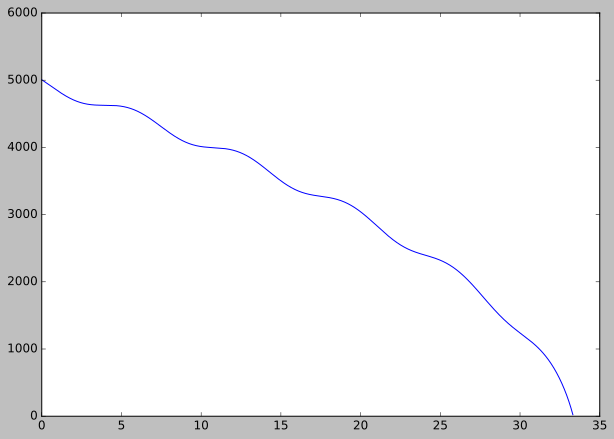

In [80]:
with plt.style.context('classic'):
    plt.figure(figsize=(10,7))
    func = res(pi/6, -0.03, N=2500, W0=5e6, B0=10, E0=5/3, stop=True)

# Случай №2. Начальные условия: 

## $\frac{db}{d\tau} = -0.01$

## $W_{0} = 5\cdot{10^6}\ эВ,$

## $B_{0} = 10\ Гс.,$

## $E_{0} = \frac{5}{3}\ СГСЭ.,$

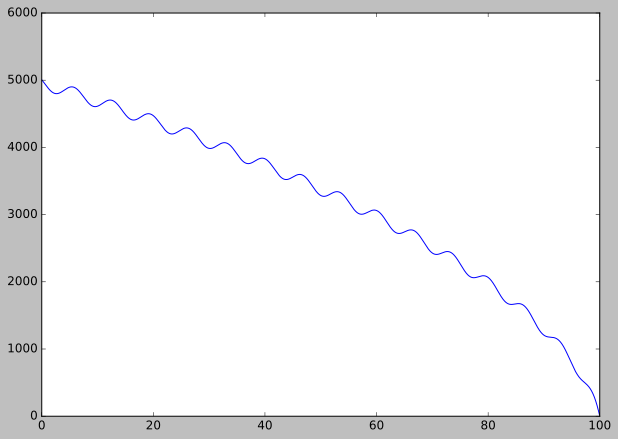

In [81]:
with plt.style.context('classic'):
    plt.figure(figsize=(10,7))
    func = res(pi/6, -0.01, N=2500, W0=5e6, B0=10, E0=5/3, stop=True)

# Случай №3. Начальные условия: 

## $\frac{db}{d\tau} = -0.005$

## $W_{0} = 5\cdot{10^6}\ эВ,$

## $B_{0} = 10\ Гс.,$

## $E_{0} = \frac{5}{3}\ СГСЭ.,$

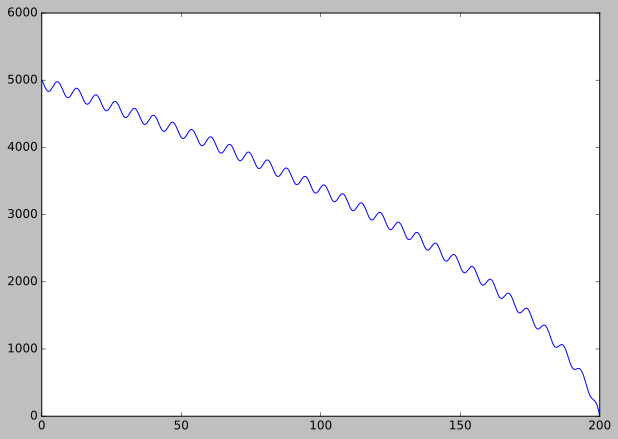

In [82]:
with plt.style.context('classic'):
    plt.figure(figsize=(10,7))
    func = res(pi/6, -0.005, N=2500, W0=5e6, B0=10, E0=5/3, stop=True)

# Случай №4. Начальные условия: 

## $\frac{db}{d\tau} = -0.001$

## $W_{0} = 5\cdot{10^6}\ эВ,$

## $B_{0} = 10\ Гс.,$

## $E_{0} = \frac{5}{3}\ СГСЭ.,$

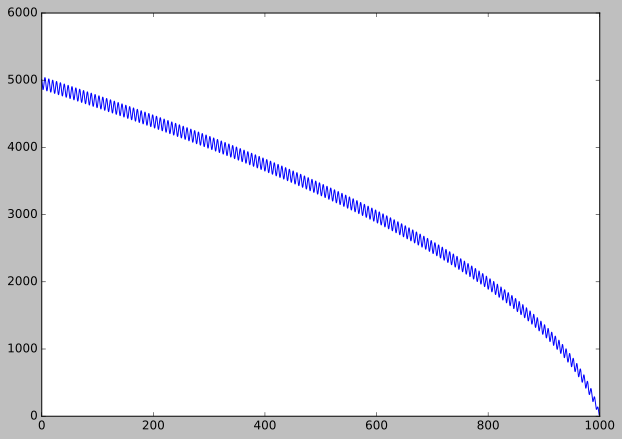

In [83]:
with plt.style.context('classic'):
    plt.figure(figsize=(10,7))
    func = res(pi/6, -0.001, N=2500, W0=5e6, B0=10, E0=5/3, stop=True)

# Случай №5. Начальные условия: 

## $\frac{db}{d\tau} = -0.0005$

## $W_{0} = 5\cdot{10^6}\ эВ,$

## $B_{0} = 10\ Гс.,$

## $E_{0} = \frac{5}{3}\ СГСЭ.,$

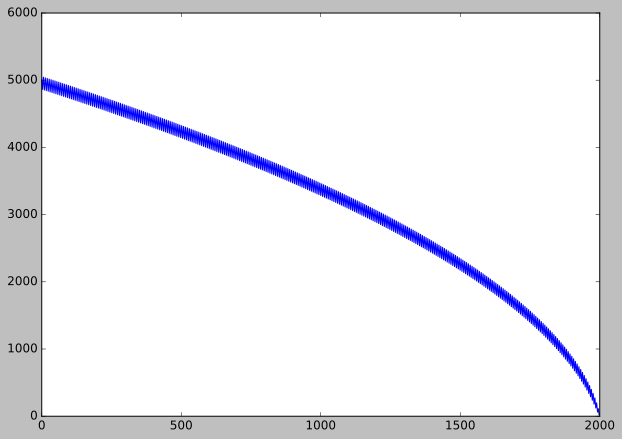

In [84]:
with plt.style.context('classic'):
    plt.figure(figsize=(10,7))
    func = res(pi/6, -0.0005, N=2500, W0=5e6, B0=10, E0=5/3, stop=True)

## $\renewcommand{\rmdefault}{ftm} Таким\ образом, самое\ быстрое\ уменьшение\ энергии\ до\ 20\ кэВ\ произошла\ в\ случае\ №2\ за \sim 100\ периодов.\ (около\ 0.5\ микросекунд)$

## $\renewcommand{\rmdefault}{ftm}\ Как\ изменятся\ параметры,\ необходимые\ для\ торможения\ электрона,\ если\ напряженность\ электрического\ СВЧ\ поля\ будет\ равна\ = 100\ В/см?$

# Случай №2'. Начальные условия: 

## $\frac{db}{d\tau} = -0.01$

## $W_{0} = 5\cdot{10^6}\ эВ,$

## $B_{0} = 10\ Гс.,$

## $E_{0} = \frac{1}{3}\ СГСЭ.,$

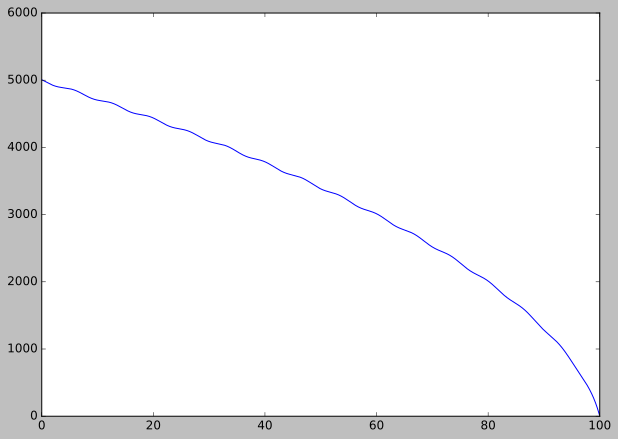

In [95]:
with plt.style.context('classic'):
    plt.figure(figsize=(10,7))
    func = res(pi/6, -0.01, N=2500, W0=5e6, B0=10, E0=1/3, stop=True)

## Видно, что колебания практически свелись к 0.

## Чтобы вернуть колебания, можно уменьшить магнитное поле в 5 раз. 

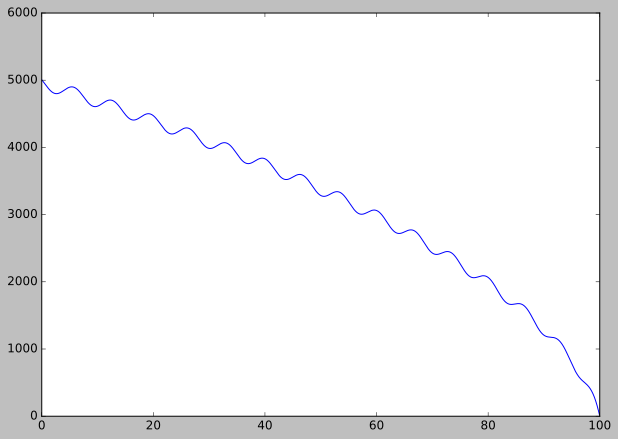

In [99]:
with plt.style.context('classic'):
    plt.figure(figsize=(10,7))
    func = res(pi/6, -0.01, N=2500, W0=5e6, B0=2, E0=1/3, stop=True)

## Или альфа.

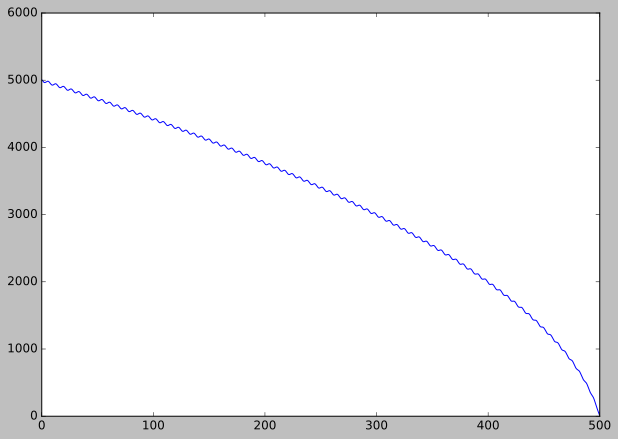

In [108]:
with plt.style.context('classic'):
    plt.figure(figsize=(10,7))
    func = res(pi/6, -0.01/5, N=2500, W0=5e6, B0=10, E0=1/3, stop=True)

In [110]:
! jupyter nbconvert --to html Chisl5.ipynb

[NbConvertApp] Converting notebook Chisl5.ipynb to html
[NbConvertApp] Writing 611976 bytes to Chisl5.html
